In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('dataset/Cleaned_House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Bathroom,Point of Contact,Total Floors,Bachelors Preferred,Family Preferred
0,2022-05-18,2,10000,1100,Ground,Super Area,Bandel,Kolkata,Unfurnished,2,Contact Owner,2,True,True
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1,Contact Owner,3,True,True
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1,Contact Owner,3,True,True
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,1,Contact Owner,2,True,True
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,Contact Owner,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,2,Contact Owner,5,True,True
4742,2022-05-15,3,29000,2000,1,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,3,Contact Owner,4,True,True
4743,2022-07-10,3,35000,1750,3,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,3,Contact Agent,5,True,True
4744,2022-07-06,3,45000,1500,23,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,2,Contact Agent,34,False,True


<AxesSubplot:>

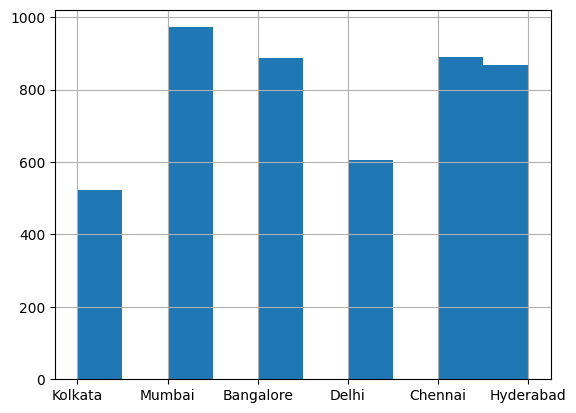

In [20]:
df.City.hist()

<AxesSubplot:>

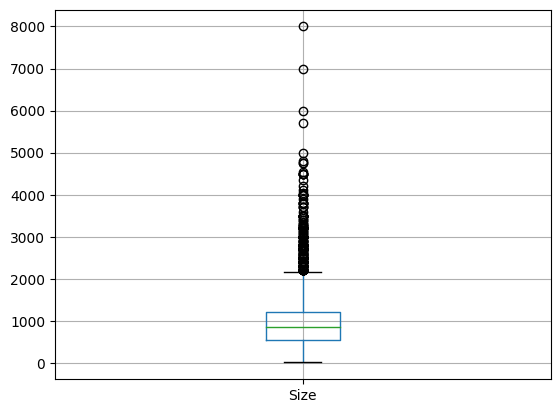

In [23]:
df.boxplot(column='Size')

In [33]:
corr = df[['City', 'Size','BHK', 'Rent', 'Bathroom', 'Total Floors']].corr()
corr

,Size,BHK,Rent,Bathroom
Size,1.000000,0.716145,0.413551,0.740703
BHK,0.716145,1.000000,0.369718,0.794885
Rent,0.413551,0.369718,1.000000,0.441215
Bathroom,0.740703,0.794885,0.441215,1.000000


<AxesSubplot:>

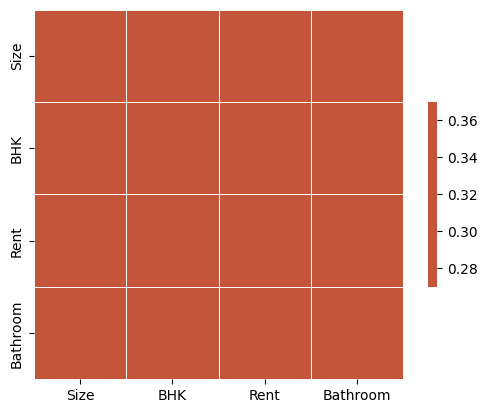

In [30]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

graph for Posted On


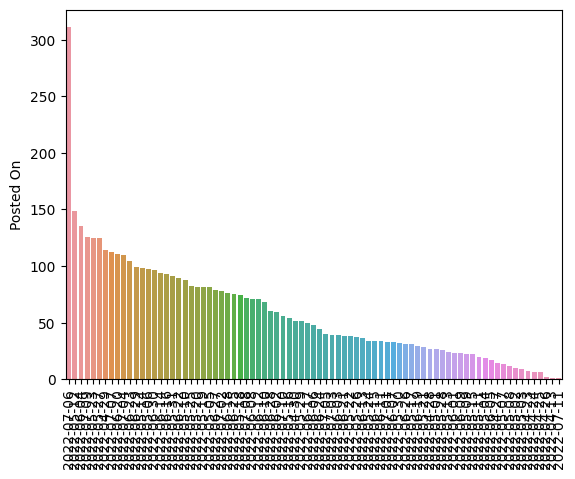

graph for BHK


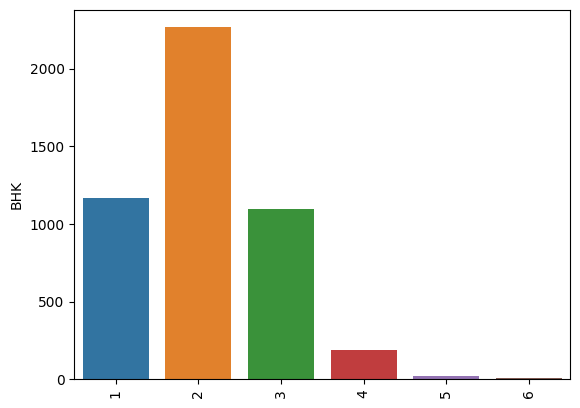

graph for Rent


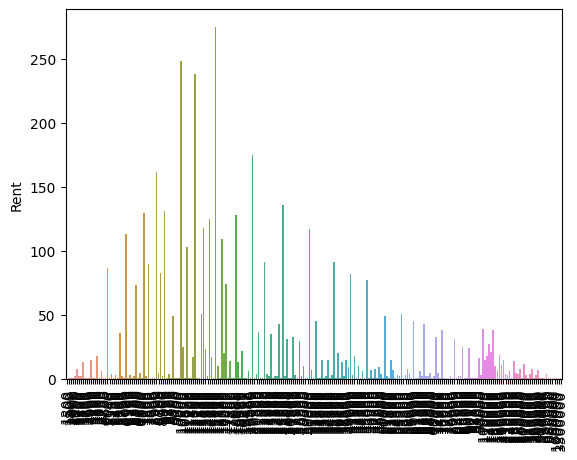

graph for Size


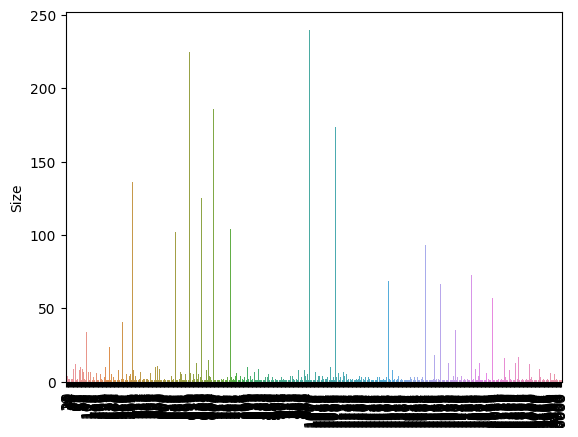

graph for Floor


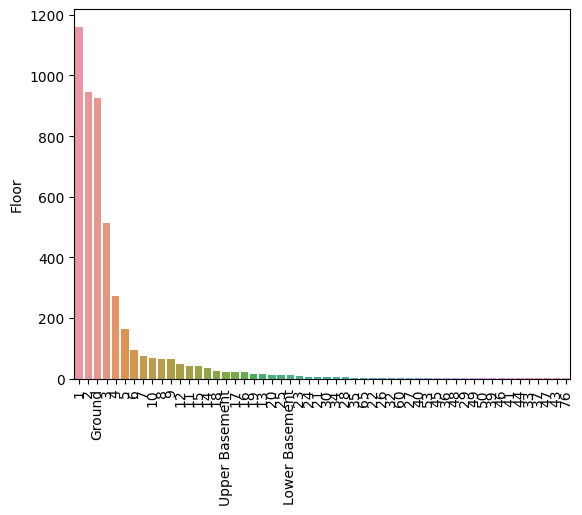

graph for Area Type


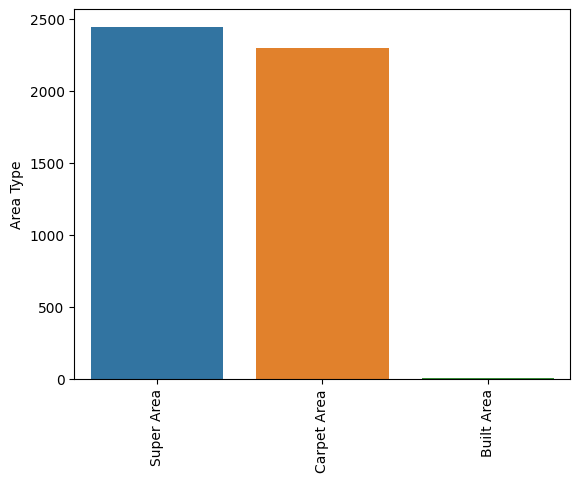

graph for Area Locality


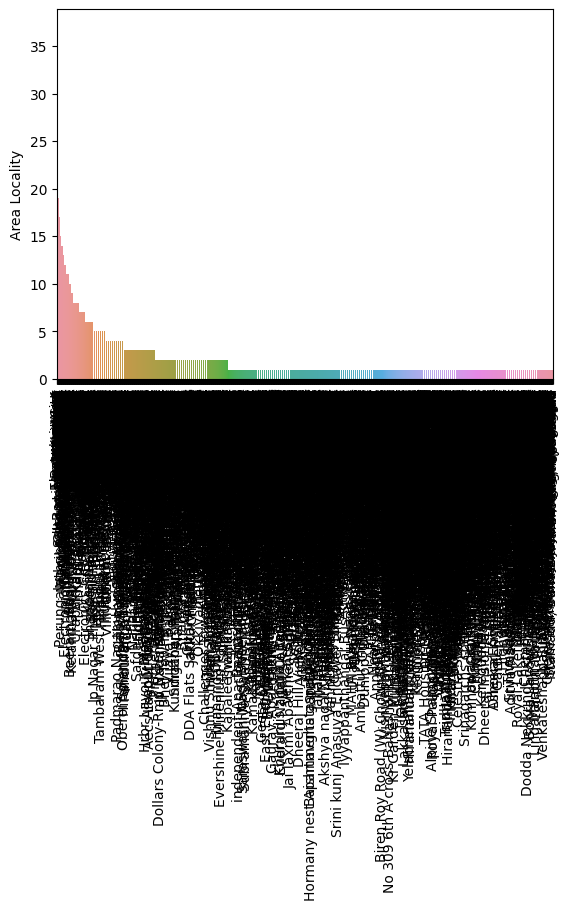

graph for City


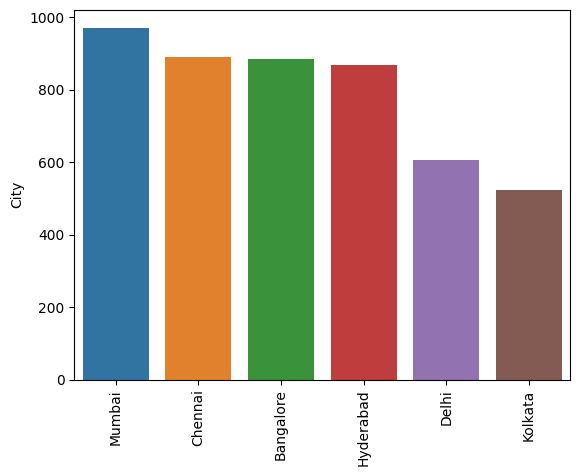

graph for Furnishing Status


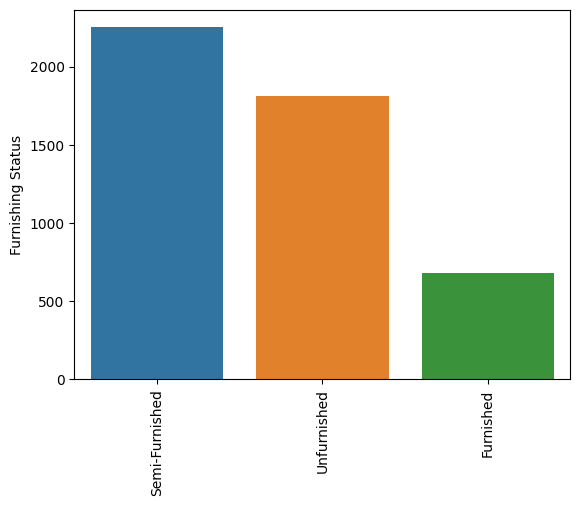

graph for Bathroom


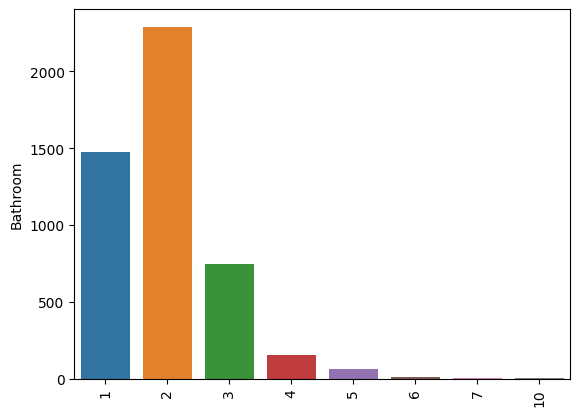

graph for Point of Contact


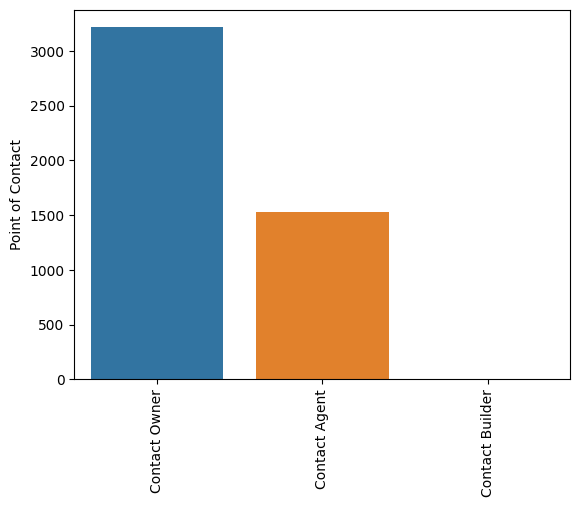

graph for Total Floors


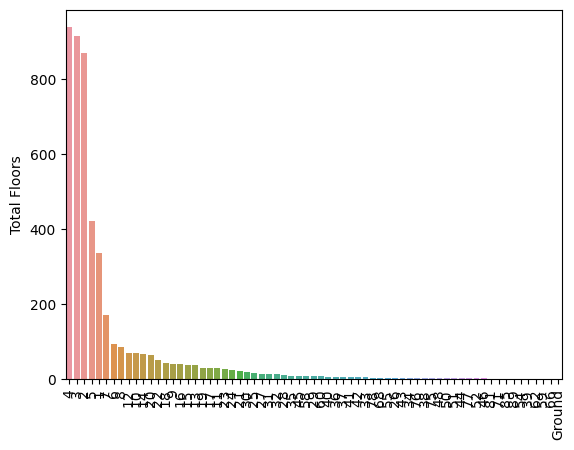

graph for Bachelors Preferred


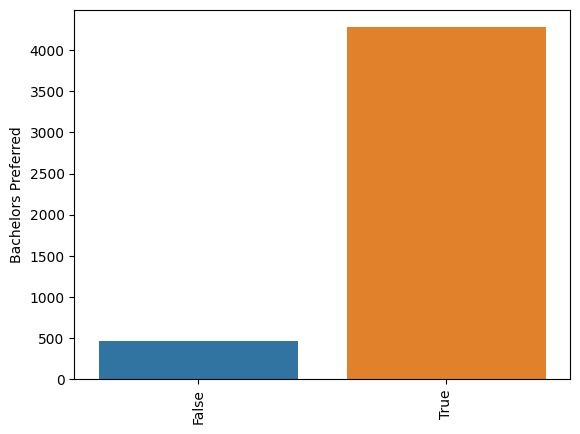

graph for Family Preferred


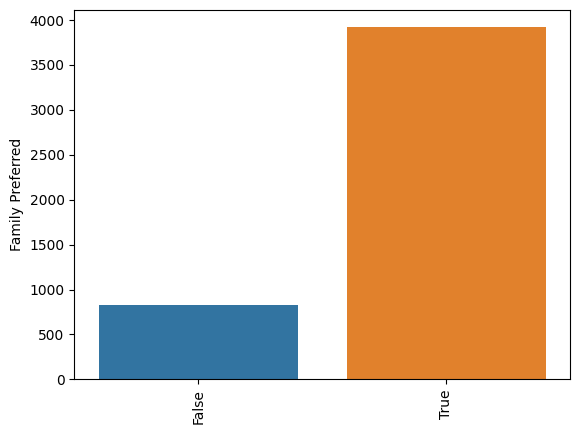

In [37]:
for i in df.columns:
    cat_num = df[i].value_counts()
    print(f"graph for {i}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), 
                          rotation=90)
    plt.show()

In [38]:
pd.pivot_table(df, index='BHK', values='Rent')

,Rent
BHK,
1,14139.223650
2,22113.864018
3,55863.062842
4,168864.555556
5,297500.000000
6,73125.000000


In [51]:
pd.pivot_table(df[df.City == 'Mumbai'], index=['BHK', 'Total Floors'], values='Rent').sort_values('Rent', ascending=False)

Rent
BHK Total Floors               
4   4             850000.000000
    15            745000.000000
    24            700000.000000
5   10            650000.000000
    20            600000.000000
...                         ...
1   21             22333.333333
    24             21269.230769
    15             18375.000000
    2              14250.000000
    19             13000.000000

[177 rows x 1 columns]